In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

In [9]:
places = pd.read_csv("Places_done.csv", low_memory=False, index_col="Num_Acc")

In [10]:
new_places = places.drop(["Unnamed: 0"], axis=1)

In [11]:
for col in new_places.columns:
    new_places = pd.concat([new_places, pd.get_dummies(new_places[col], prefix=col, prefix_sep='_')], axis=1)
    new_places.drop(col, axis=1, inplace=True)

In [12]:
new_places.columns

Index(['catr_0', 'catr_1', 'catr_2', 'circ_0', 'circ_1', 'vosp_0', 'vosp_1',
       'prof_0', 'prof_1', 'plan_0', 'plan_1', 'larrout_0', 'larrout_1',
       'surf_0', 'surf_1', 'surf_2', 'situ_0', 'situ_1'],
      dtype='object')

In [13]:
cluster_places = new_places.drop(columns=['catr_0', 'circ_0', 'vosp_0','prof_0', 'plan_0', 'larrout_0', 'surf_0','situ_0'], axis=1)

In [14]:
cluster_places.head()

,catr_1,catr_2,circ_1,vosp_1,prof_1,plan_1,larrout_1,surf_1,surf_2,situ_1
Num_Acc,,,,,,,,,,
201600000001,0,0,1,1,0,1,0,0,0,0
201600000002,0,0,0,1,0,1,0,0,0,0
201600000003,0,0,1,1,0,1,0,1,0,1
201600000004,1,0,1,1,0,0,0,0,0,0
201600000005,1,0,0,1,1,0,0,0,0,0


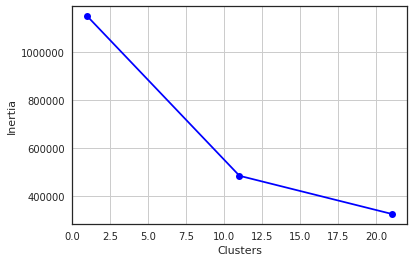

In [15]:
from sklearn.cluster import KMeans

# Range de valores de clusters que vamos testar
k = range(1,31,10)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i, n_jobs=-1)

    # Treine o modelo
    model = kmeans.fit(cluster_places)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [16]:
kmeans = KMeans(n_clusters=10, n_jobs=-1)
labels = kmeans.fit_predict(cluster_places)

In [17]:
label, count = np.unique(labels, return_counts=True)
for l, c in zip(label,count):
    print('Cluster {}: {}'.format(l,c))

Cluster 0: 63050
Cluster 1: 110809
Cluster 2: 99372
Cluster 3: 58178
Cluster 4: 84665
Cluster 5: 61399
Cluster 6: 87689
Cluster 7: 152501
Cluster 8: 31781
Cluster 9: 90541


In [23]:
clusters_n = kmeans.labels_.astype(np.int)

In [24]:
clusters_n

array([5, 0, 5, ..., 6, 3, 0])

In [25]:
new_places["cluster"] = clusters_n
new_places.groupby("cluster").mean()

,catr_0,catr_1,catr_2,circ_0,circ_1,vosp_0,vosp_1,prof_0,prof_1,plan_0,plan_1,larrout_0,larrout_1,surf_0,surf_1,surf_2,situ_0,situ_1
cluster,,,,,,,,,,,,,,,,,,
0,0.611467,0.316844,0.071689,1.000000,0.000000,0.039730,0.960270,0.686947,0.313053,0.000000,1.000000,0.819207,0.180793,0.662902,0.240333,0.096764,0.790531,0.209469
1,0.741808,0.224170,0.034023,0.108746,0.891254,0.034835,0.965165,0.000000,1.000000,0.740770,0.259230,0.957422,0.042578,0.796027,0.163200,0.040773,0.897183,0.102817
2,0.386266,0.594051,0.019684,0.290746,0.709254,0.057169,0.942831,0.917079,0.082921,0.891247,0.108753,0.890482,0.109518,0.000000,1.000000,0.000000,0.898191,0.101809
3,0.199388,0.793015,0.007597,0.299237,0.700763,0.155007,0.844993,0.916721,0.083279,0.967806,0.032194,0.000000,1.000000,0.959400,0.021245,0.019354,0.941284,0.058716
4,0.937826,0.000000,0.062174,1.000000,0.000000,0.052371,0.947629,0.927373,0.072627,1.000000,0.000000,0.531341,0.468659,0.882076,0.096085,0.021839,0.871281,0.128719
5,0.913337,0.050587,0.036076,0.000000,1.000000,0.032900,0.967100,0.811772,0.188228,0.229124,0.770876,0.971547,0.028453,0.846268,0.092884,0.060848,0.351520,0.648480
6,0.000000,1.000000,0.000000,1.000000,0.000000,0.102886,0.897114,0.874226,0.125774,1.000000,0.000000,1.000000,0.000000,0.973623,0.000000,0.026377,0.893578,0.106422
7,0.000000,1.000000,0.000000,0.000000,1.000000,0.065462,0.934538,1.000000,0.000000,0.896591,0.103409,1.000000,0.000000,0.974446,0.000000,0.025554,0.927889,0.072111
8,0.000000,1.000000,0.000000,0.396746,0.603254,0.035839,0.964161,0.000000,1.000000,0.010415,0.989585,0.946194,0.053806,0.575784,0.152827,0.271389,0.756521,0.243479


In [26]:
new_places.head()

,catr_0,catr_1,catr_2,circ_0,circ_1,vosp_0,vosp_1,prof_0,prof_1,plan_0,plan_1,larrout_0,larrout_1,surf_0,surf_1,surf_2,situ_0,situ_1,cluster
Num_Acc,,,,,,,,,,,,,,,,,,,
201600000001,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,5
201600000002,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0
201600000003,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,5
201600000004,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,7
201600000005,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,6


In [27]:
cluster_places["cluster_places"] = clusters_n
cluster_places.head()

,catr_1,catr_2,circ_1,vosp_1,prof_1,plan_1,larrout_1,surf_1,surf_2,situ_1,cluster_places
Num_Acc,,,,,,,,,,,
201600000001,0,0,1,1,0,1,0,0,0,0,5
201600000002,0,0,0,1,0,1,0,0,0,0,0
201600000003,0,0,1,1,0,1,0,1,0,1,5
201600000004,1,0,1,1,0,0,0,0,0,0,7
201600000005,1,0,0,1,1,0,0,0,0,0,6


In [28]:
cluster_places.to_csv("places_with_clusters.csv", sep=',')